In [1]:
import pandas as pd

# CSV dosyalarını yükleme
categories_df = pd.read_csv('categories.csv')
customers_df = pd.read_csv('customers.csv')
employees_df = pd.read_csv('employees.csv')
orders_df = pd.read_csv('orders.csv')
orders_details_df = pd.read_csv('orders_details.csv')
products_df = pd.read_csv('products.csv')
regions_df = pd.read_csv('regions.csv')
shippers_df = pd.read_csv('shippers.csv')
suppliers_df = pd.read_csv('suppliers.csv')
territories_df = pd.read_csv('territories.csv')
employee_territories_df = pd.read_csv('employee_territories.csv')


In [2]:
#Analiz 1: Her bir kategori için kaç ürün olduğunun hesaplanması

# Her bir kategorinin ürün sayısını hesapla
product_counts_by_category = products_df['categoryid'].value_counts().sort_index()

# Her bir kategorinin ismini eşleştir
category_names = categories_df.set_index('categoryid')['categoryname']

# Sonuçları birleştir
category_product_counts = pd.concat([category_names, product_counts_by_category], axis=1)
category_product_counts.columns = ['CategoryName', 'ProductCount']

print(category_product_counts)


     CategoryName  ProductCount
1       Beverages            12
2      Condiments            12
3     Confections            13
4  Dairy Products            10
5  Grains/Cereals             7
6    Meat/Poultry             6
7         Produce             5
8         Seafood            12


In [3]:
#Analiz 2: Her bir çalışanın kaç siparişi olduğunu bulunması


# Her bir çalışanın sipariş sayısını hesapla
orders_per_employee = orders_df['employeeid'].value_counts().sort_index()

# Her bir çalışanın ismini eşleştir
employee_names = employees_df.set_index('employeeid')[['lastname', 'firstname']]

# Sonuçları birleştir
employee_order_counts = pd.concat([employee_names, orders_per_employee], axis=1)
employee_order_counts.columns = ['LastName', 'FirstName', 'OrderCount']

print(employee_order_counts)


    LastName FirstName  OrderCount
1    Davolio     Nancy         123
2     Fuller    Andrew          96
3  Leverling     Janet         127
4    Peacock  Margaret         156
5   Buchanan    Steven          42
6     Suyama   Michael          67
7       King    Robert          72
8   Callahan     Laura         104
9  Dodsworth      Anne          43


In [5]:
# Ürünlerin kategorilerine göre ortalama birim fiyatları

# Ürünlerin kategorilerine göre ortalama birim fiyatları
average_unit_prices = products_df.groupby('categoryid')['unitprice'].mean()

print(average_unit_prices)


categoryid
1    37.979167
2    22.854167
3    25.160000
4    28.730000
5    20.250000
6    54.006667
7    32.370000
8    20.682500
Name: unitprice, dtype: float64


In [12]:
#Her bir müşterinin hangi ülkeden olduğunun analizi ve kaç müşterinin her bir ülkeden olduğunun sayılması.

# CSV dosyalarını yükleme
customers_df = pd.read_csv('customers.csv')

# Her bir ülkenin müşteri sayısını hesapla
customer_counts_by_country = customers_df['country'].value_counts()

print(customer_counts_by_country)


USA            13
Germany        11
France         11
Brazil          9
UK              7
Spain           5
Mexico          5
Venezuela       4
Canada          3
Argentina       3
Italy           3
Finland         2
Denmark         2
Belgium         2
Austria         2
Portugal        2
Switzerland     2
Sweden          2
Ireland         1
Norway          1
Poland          1
Name: country, dtype: int64


In [14]:
#Her bir çalışanın aldığı siparişlerin toplam tutarının analizi.

# CSV dosyalarını yükleme
orders_df = pd.read_csv('orders.csv')
order_details_df = pd.read_csv('orders_details.csv')

# Her bir siparişin toplam tutarını hesapla
order_details_df['total_price'] = order_details_df['unitprice'] * order_details_df['quantity']

# Her bir çalışanın aldığı toplam sipariş tutarını hesapla
total_order_amount_per_employee = order_details_df.merge(orders_df, on='orderid').groupby('employeeid')['total_price'].sum()

print(total_order_amount_per_employee)


employeeid
1    202143.71
2    177749.26
3    213051.30
4    250187.45
5     75567.75
6     78198.10
7    141295.99
8    133301.03
9     82964.00
Name: total_price, dtype: float64


In [16]:
# Her bir müşterinin sipariş ettiği ürün kategorilerinin analizi.
orders_df = pd.read_csv('orders.csv')
order_details_df = pd.read_csv('orders_details.csv')
products_df = pd.read_csv('products.csv')

# Siparişlerle ürünlerin birleştirilmesi
order_product_details = order_details_df.merge(products_df, on='productid')

# Siparişlerin kategorilere göre gruplanması
orders_per_category_per_customer = order_product_details.merge(orders_df, on='orderid').groupby(['customerid', 'categoryid']).size()

print(orders_per_category_per_customer)

customerid  categoryid
ALFKI       1             2
            2             4
            4             2
            7             2
            8             2
                         ..
WOLZA       3             2
            4             2
            6             1
            7             2
            8             1
Length: 598, dtype: int64


In [20]:
#Ürünlerin kategorilerine göre ortalama stok miktarları
average_stock_amounts = products_df.groupby('categoryid')['unitsinstock'].mean()

print(average_stock_amounts)


categoryid
1    46.583333
2    42.250000
3    29.692308
4    39.300000
5    44.000000
6    27.500000
7    20.000000
8    58.416667
Name: unitsinstock, dtype: float64


In [21]:
#Ürünlerin kategorilerine göre ortalama satış adetleri

average_sales_amounts = order_details_df.merge(products_df, on='productid').groupby('categoryid')['quantity'].mean()

print(average_sales_amounts)



categoryid
1    23.594059
2    24.527778
3    23.670659
4    24.997268
5    23.275510
6    24.271676
7    21.985294
8    23.275758
Name: quantity, dtype: float64


In [22]:
#Her bir çalışanın hangi bölgelerdeki müşterilere hizmet verdiğinin analizi.

# CSV dosyalarını yükleme
employee_territories_df = pd.read_csv('employee_territories.csv')
territories_df = pd.read_csv('territories.csv')
regions_df = pd.read_csv('regions.csv')

# Çalışanların bölge bilgilerini al
employee_territories_with_region = employee_territories_df.merge(territories_df, on='territoryid')
employee_regions = employee_territories_with_region.merge(regions_df, on='regionid')

# Her bir çalışanın hangi bölgelerde hizmet verdiğini say
employee_territory_counts = employee_regions.groupby(['employeeid', 'regiondescription']).size()

print(employee_territory_counts)


employeeid  regiondescription
1           Eastern               2
2           Eastern               7
3           Southern              4
4           Eastern               3
5           Eastern               7
6           Western               5
7           Western              10
8           Northern              4
9           Northern              7
dtype: int64


In [25]:
#Müşteri ülkelerine göre toplam sipariş sayısının analizi. 

# CSV dosyalarını yükleme
orders_df = pd.read_csv('orders.csv')
customers_df = pd.read_csv('customers.csv')

# Siparişleri müşterilere göre birleştirme
orders_with_customers = orders_df.merge(customers_df, on='customerid')

# Müşteri ülkelerine göre toplam sipariş sayısını hesapla
order_count_per_country = orders_with_customers.groupby('country').size()

print(order_count_per_country)

print(order_count_per_country)




country
Argentina       16
Austria         40
Belgium         19
Brazil          83
Canada          30
Denmark         18
Finland         22
France          77
Germany        122
Ireland         19
Italy           28
Mexico          28
Norway           6
Poland           7
Portugal        13
Spain           23
Sweden          37
Switzerland     18
UK              56
USA            122
Venezuela       46
dtype: int64


In [27]:
# Çalışan başına ortalama sipariş sayısının analizi.

orders_df = pd.read_csv('orders.csv')
employees_df = pd.read_csv('employees.csv')
orders_with_employees = orders_df.merge(employees_df, on='employeeid')

# Siparişleri çalışanlara göre birleştirme


# Çalışan başına ortalama sipariş sayısını hesapla
average_orders_per_employee = orders_with_employees.groupby(['lastname', 'firstname']).size().mean()
print(average_orders_per_employee)

92.22222222222223


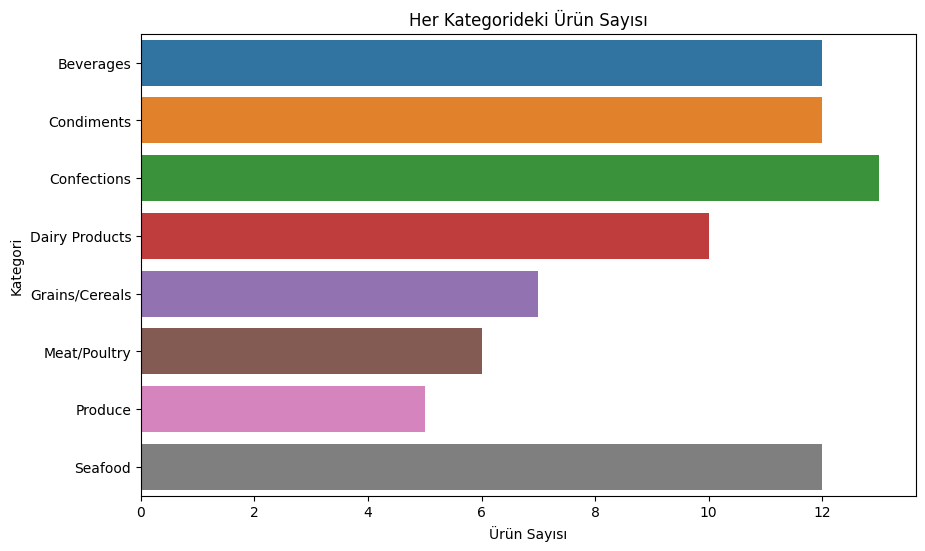

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analiz 1: Her bir kategori için kaç ürün olduğunun hesaplanması
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCount', y='CategoryName', data=category_product_counts)
plt.title('Her Kategorideki Ürün Sayısı')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Kategori')
plt.show()

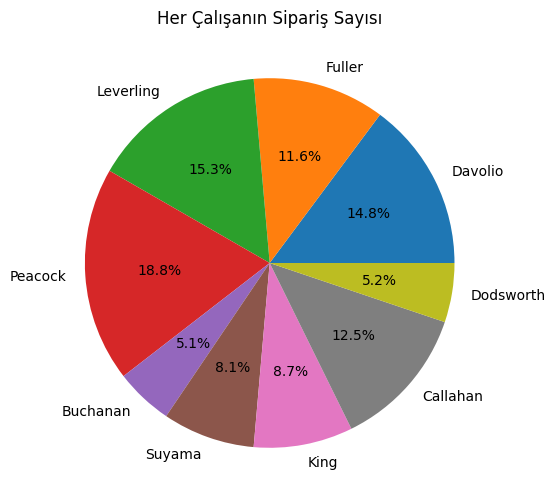

In [30]:
# Analiz 2: Her bir çalışanın kaç siparişi olduğunun bulunması
plt.figure(figsize=(10, 6))
plt.pie(employee_order_counts['OrderCount'], labels=employee_order_counts['LastName'], autopct='%1.1f%%')
plt.title('Her Çalışanın Sipariş Sayısı')
plt.show()

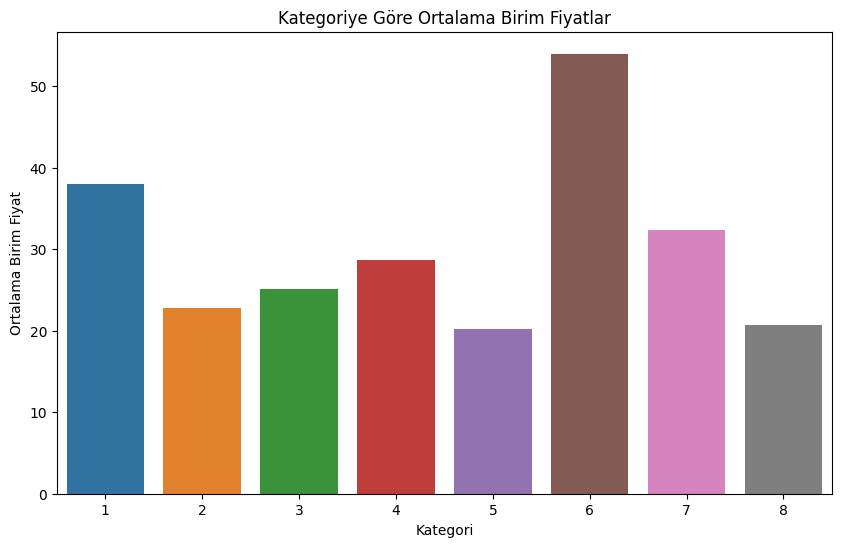

In [31]:

# Ürünlerin kategorilerine göre ortalama birim fiyatları
plt.figure(figsize=(10, 6))
sns.barplot(x=average_unit_prices.index, y=average_unit_prices)
plt.title('Kategoriye Göre Ortalama Birim Fiyatlar')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Birim Fiyat')
plt.show()


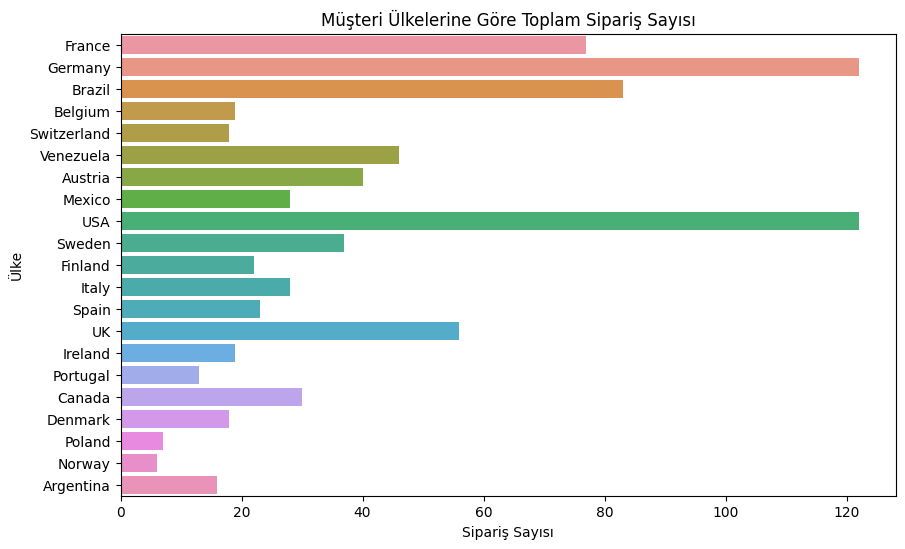

In [33]:
#Müşteri ülkelerine göre toplam sipariş sayısının dağılımı:
plt.figure(figsize=(10, 6))
sns.countplot(y=orders_with_customers['country'])
plt.title('Müşteri Ülkelerine Göre Toplam Sipariş Sayısı')
plt.xlabel('Sipariş Sayısı')
plt.ylabel('Ülke')
plt.show()



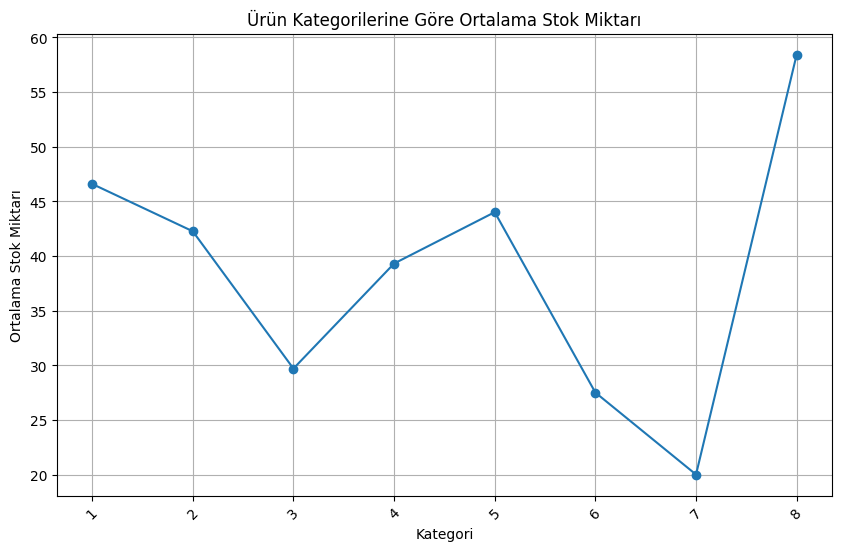

In [35]:
plt.figure(figsize=(10, 6))
average_stock_amounts.plot(kind='line', marker='o')
plt.title('Ürün Kategorilerine Göre Ortalama Stok Miktarı')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Stok Miktarı')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


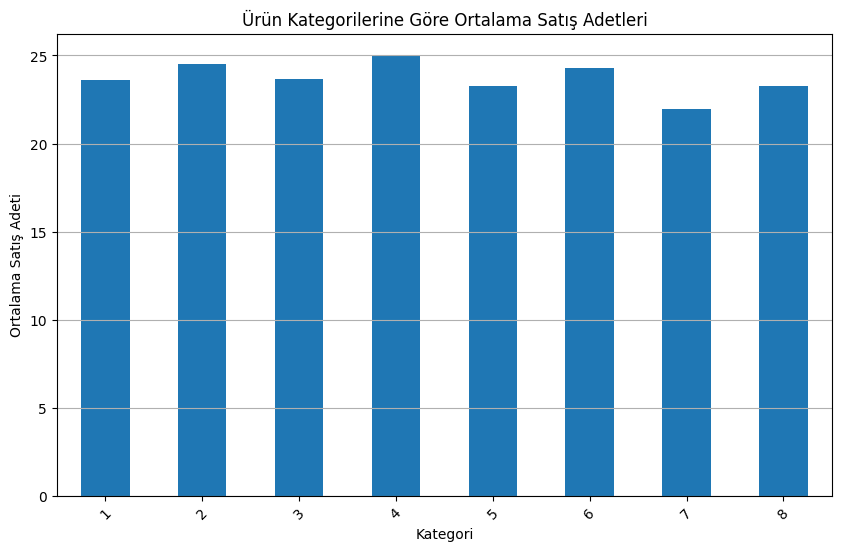

In [36]:
#Ürünlerin kategorilerine göre ortalama satış adetleri
plt.figure(figsize=(10, 6))
average_sales_amounts.plot(kind='bar')
plt.title('Ürün Kategorilerine Göre Ortalama Satış Adetleri')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Satış Adeti')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


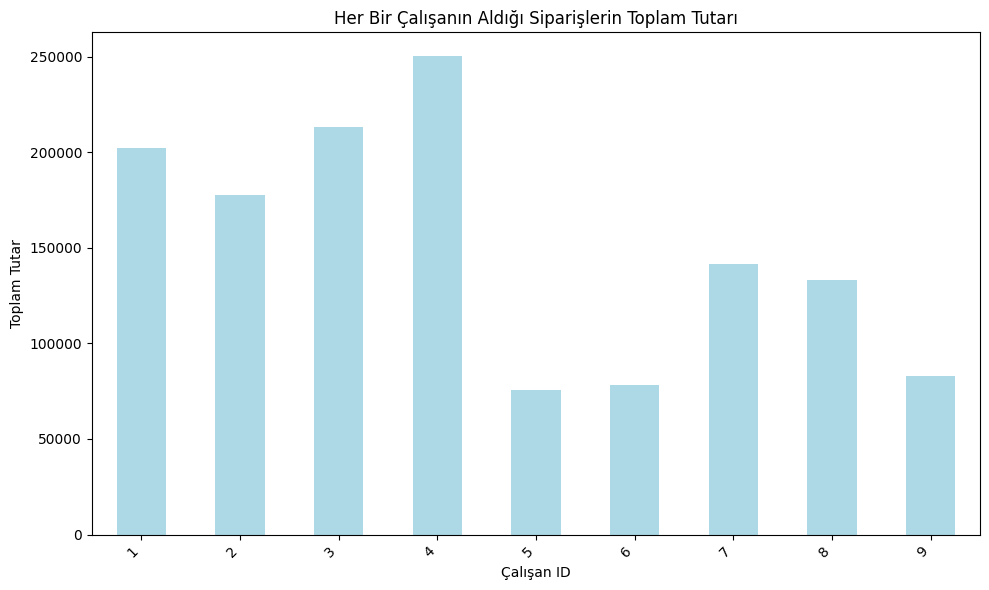

In [40]:
# Verilerinizi kullanarak çubuk grafiği veya dağılım grafiği 
plt.figure(figsize=(10, 6))
total_order_amount_per_employee.plot(kind='bar', color='lightblue')
plt.title('Her Bir Çalışanın Aldığı Siparişlerin Toplam Tutarı')
plt.xlabel('Çalışan ID')
plt.ylabel('Toplam Tutar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


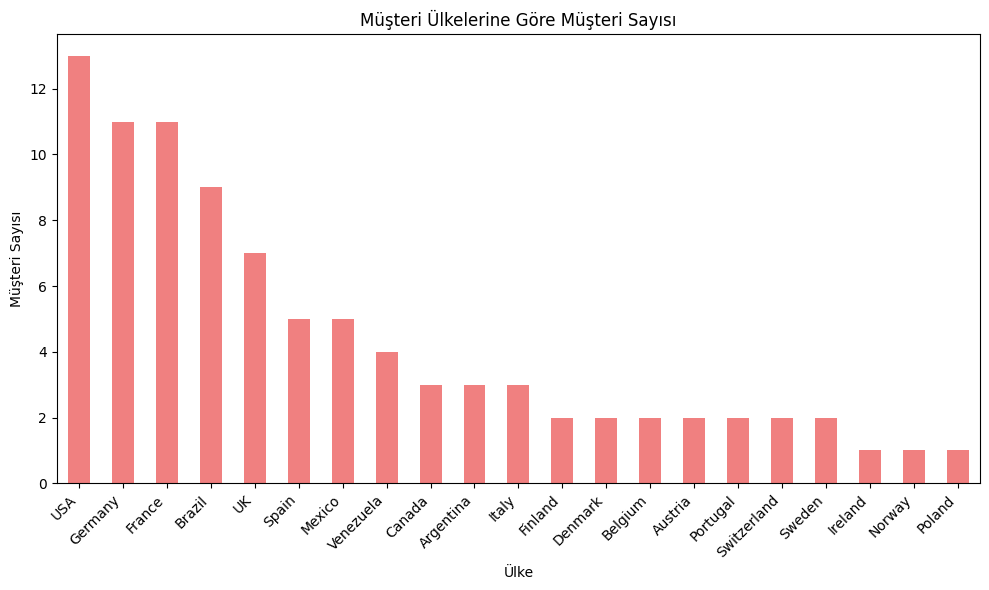

In [43]:
# Verilerinizi kullanarak pasta grafiği veya çubuk grafiği 
plt.figure(figsize=(10, 6))
customer_counts_by_country.plot(kind='bar', color='lightcoral')
plt.title('Müşteri Ülkelerine Göre Müşteri Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


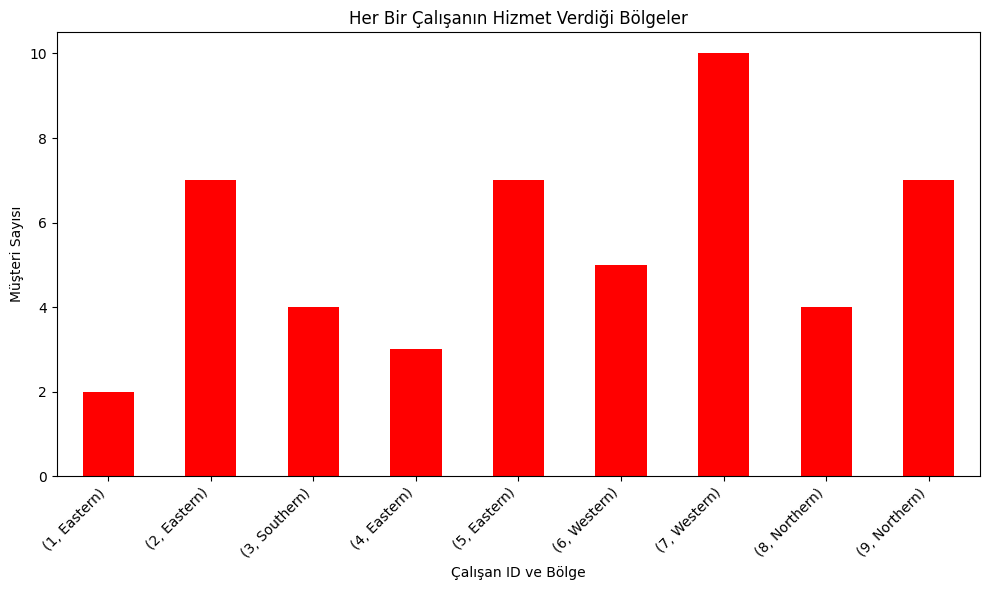

In [45]:
# Verilerinizi kullanarak pasta grafiği veya çubuk grafiği 
plt.figure(figsize=(10, 6))
employee_territory_counts.plot(kind='bar', color='red')
plt.title('Her Bir Çalışanın Hizmet Verdiği Bölgeler')
plt.xlabel('Çalışan ID ve Bölge')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
